## Exploring Business Analytics
EDA of Business Data for a Sample Superstore.

To find out the weak areas and business problems we can derive by exploring the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.isna().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [4]:
data.duplicated().sum()

17

In [5]:
data.drop_duplicates(subset = None, keep = 'first', inplace = True)
data.duplicated().sum()

0

In [6]:
data['Country'].nunique()

1

In [7]:
data=data.drop(['Country', 'Postal Code'], axis=1)

In [8]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [9]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


### Removing outliers before EDA

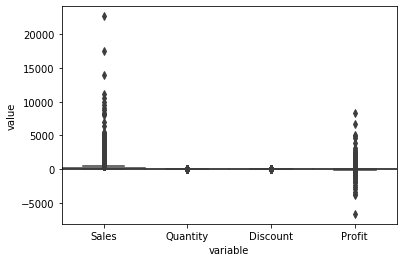

In [10]:
df_con=data.select_dtypes(include=[np.number])

sns.boxplot(x="variable", y="value", data=pd.melt(df_con), width=1)
plt.show()

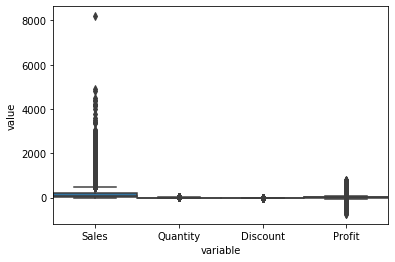

In [11]:
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

remove_outlier(data,k=3.33)

ds_con=ds.select_dtypes(include=[np.number])
sns.boxplot(x="variable", y="value", data=pd.melt(ds_con), width=1)

### Exploratory Data Analysis (EDA)

In [12]:
ds.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
ds.describe()

,Sales,Quantity,Discount,Profit
count,9889.000000,9889.000000,9889.000000,9889.000000
mean,196.570036,3.776519,0.155131,24.150294
std,383.949264,2.222506,0.204991,94.164961
min,0.444000,1.000000,0.000000,-734.526400
25%,17.088000,2.000000,0.000000,1.747200
50%,52.990000,3.000000,0.200000,8.611200
75%,203.520000,5.000000,0.200000,28.857600
max,8187.650000,14.000000,0.800000,793.716000


### Unique entries in the Categorical columns

In [14]:
for col in ds.columns:
    if ds[col].dtype=='object':
        print("Number of unique entries in",col + " are",ds[col].nunique())
        print("==========================================================")

Number of unique entries in Ship Mode are 4
Number of unique entries in Segment are 3
Number of unique entries in City are 531
Number of unique entries in State are 49
Number of unique entries in Region are 4
Number of unique entries in Category are 3
Number of unique entries in Sub-Category are 17


In [15]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

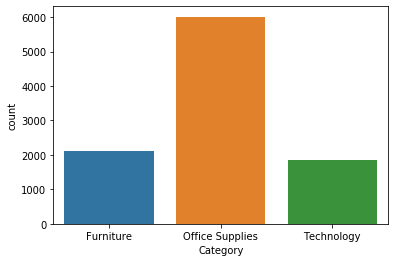

In [16]:
sns.countplot(data['Category'])

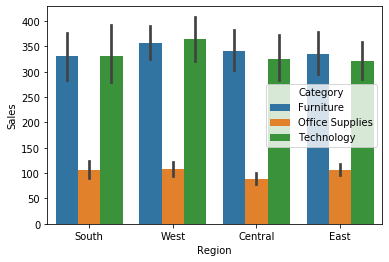

In [17]:
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=ds)

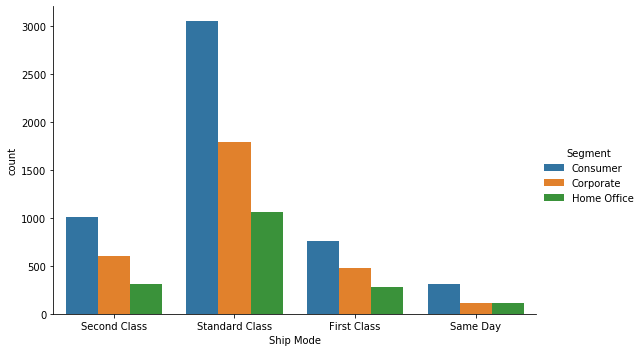

In [18]:
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5)

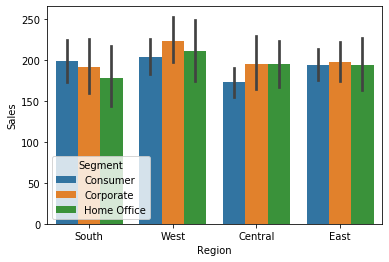

In [19]:
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds)

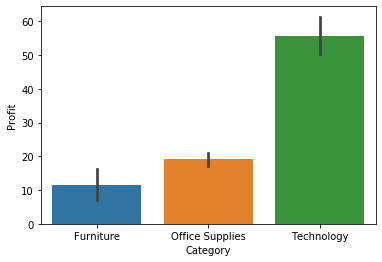

In [20]:
ax = sns.barplot(x="Category", y="Profit", data=ds)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

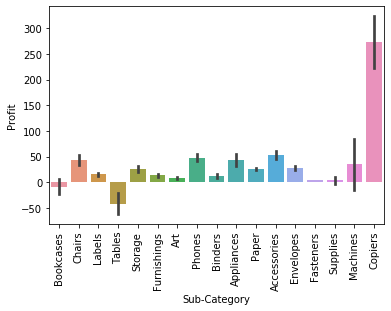

In [21]:
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds)
plt.xlabel="Subcategory"
plt.ylabel="Profit"
plt.xticks(rotation=90)

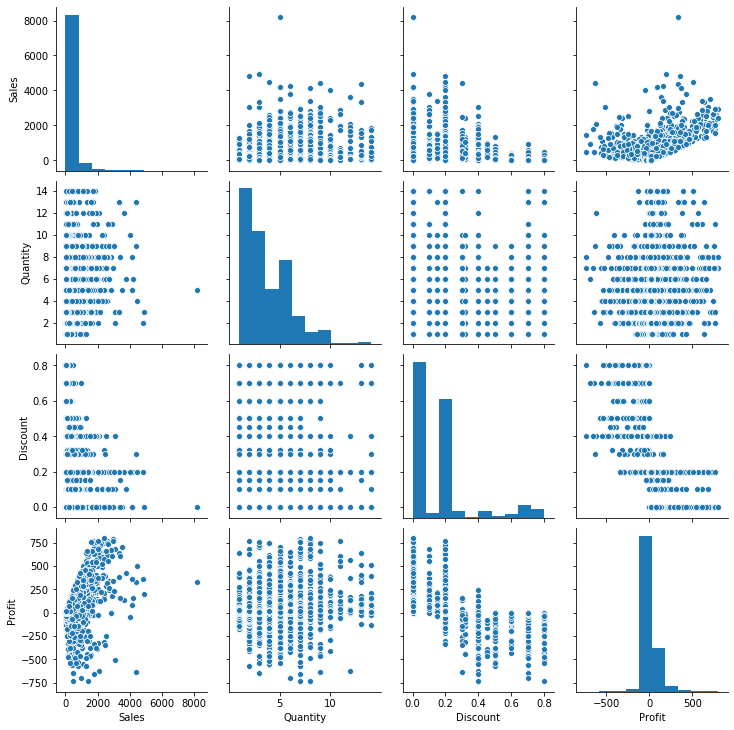

In [22]:
sns.pairplot(ds)

In [23]:
city_group= ds.groupby("City")
agg_sales=city_group['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()

agg_sales.head()

,City,Sales
0,New York City,197246.023
1,Los Angeles,164434.549
2,San Francisco,109777.212
3,Seattle,96250.488
4,Philadelphia,91772.849


New York City has the most amount of sales followed by Los Angeles and San Fracisco

In [24]:
agg_profit=city_group['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()
agg_profit.head()

,City,Profit
0,New York City,39934.8107
1,Los Angeles,26544.4140
2,Seattle,18916.8467
3,San Francisco,16521.1321
4,Detroit,8200.3235



Most profit is earned from New York City followed by Los Angeles and Seattle

In [26]:
agg_profit.tail()

,City,Profit
526,Phoenix,-1976.4000
527,Aurora,-2691.7386
528,Chicago,-3449.9438
529,Houston,-3790.4016
530,Philadelphia,-11487.8346


In [27]:
avg_sales=city_group['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()
avg_sales.head()

,City,Sales
0,Cheyenne,1603.136000
1,Bellingham,1263.413333
2,Independence,1208.685000
3,Burbank,1082.386000
4,Buffalo,906.349600


In [28]:
avg_profit=city_group['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()
avg_profit.head()

,City,Profit
0,Independence,487.831500
1,Appleton,277.383150
2,Burbank,254.844600
3,Lehi,225.831300
4,Beverly,218.306467


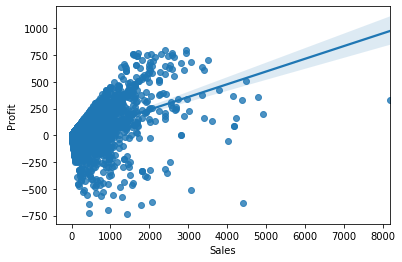

In [29]:
sns.regplot(ds['Sales'], ds['Profit'])
plt.show()

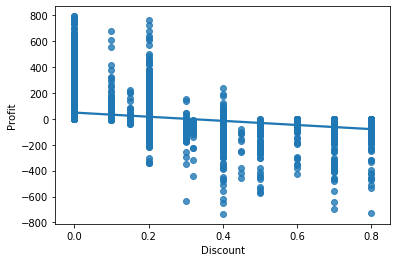

In [30]:
sns.regplot(ds['Discount'], ds['Profit'])
plt.show()

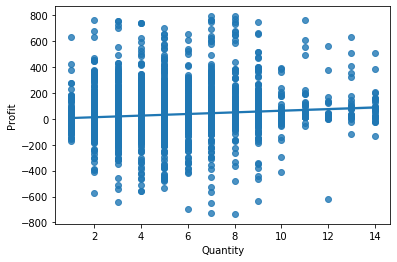

In [31]:
sns.regplot(ds['Quantity'], ds['Profit'])
plt.show()

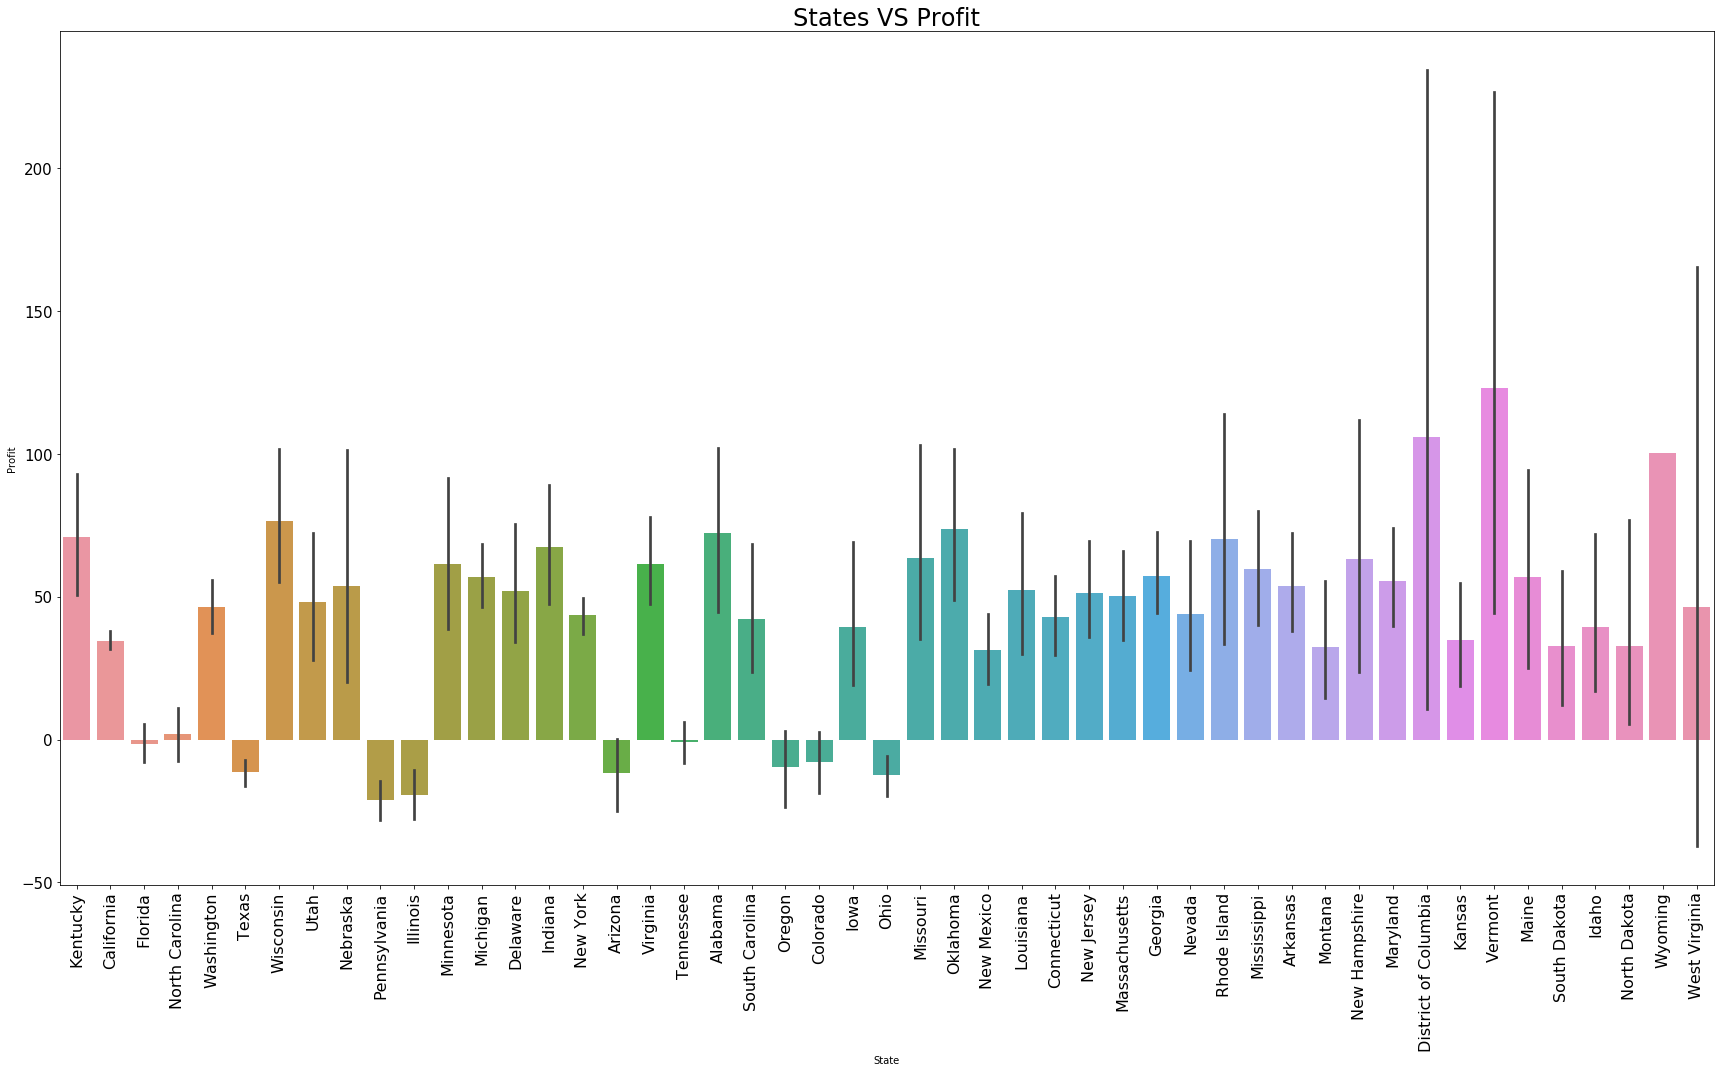

In [32]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel='States'
plt.ylabel='Profit'
plt.tight_layout()

## Summary


### Problems:
The average Profits generated by Furniture, especially Tables and Bookcases is very low, and Office products is moderate.

Discount given for the items are not resulting in any more profits.

Profit is incosistent for quantity of products.

States like 'Texas', 'Pennsylvania','Illinois','Arizona','Oregon','Colorado','Ohio' are generating losses.

Cities which topped in the highest average Sales and Profit are not leading in Profit and Sales.

### Proposed Solutions:
Increasing the sales of Furniture and Office Products.

Discounts should be offered in plces that are necessary only.

Regulating the prices of products to make better profits with the quantity produced.

To increase the profit in loss driven States and Cities accordingly.